In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer_dataset.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,Medium,Low,Low,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Low,Medium,Low,1.0


In [3]:
df.shape

(7043, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   SeniorCitizen          7043 non-null   int64  
 2   Partner                7043 non-null   object 
 3   Dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   PhoneService           7043 non-null   object 
 6   MultipleLines          7043 non-null   object 
 7   InternetService        7043 non-null   object 
 8   OnlineSecurity         7043 non-null   object 
 9   OnlineBackup           7043 non-null   object 
 10  DeviceProtection       7043 non-null   object 
 11  TechSupport            7043 non-null   object 
 12  StreamingTV            7043 non-null   object 
 13  StreamingMovies        7043 non-null   object 
 14  Contract               7043 non-null   object 
 15  Pape

In [5]:
df.isnull().sum()

gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
tenure-binned            0
MonthlyCharges-binned    0
TotalCharges-binned      0
Churn                    0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# Data Manipulation

#### 1) Extract 5th column and store it in 'customer_5'

In [7]:
customer_5 = df.iloc[:,4]
customer_5.head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

#### 2) Extract 13th column and store it in 'customer_13'

In [8]:
customer_13 = df.iloc[:,13]
customer_13.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [9]:
customer_13 = df.loc[:,['StreamingMovies']]
customer_13.head(10)

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
5,Yes
6,No
7,No
8,Yes
9,No


#### 3) Extract all the male senior citizens whose payment method is electronic check & store the result in 'senior_payment'

In [10]:
senior_payment = df[(df['PaymentMethod'] == 'Electronic check') & (df['gender'] == 'Male') & (df['SeniorCitizen'] == 1)]
senior_payment.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
20,Male,1,No,No,1,No,No phone service,DSL,No,No,...,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Low,Low,Low,1.0
55,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Low,High,Low,1.0
57,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Electronic check,108.45,7076.35,High,High,High,0.0
78,Male,1,No,No,30,Yes,No,DSL,Yes,Yes,...,Yes,Month-to-month,Yes,Electronic check,74.75,2111.30,Medium,Medium,Low,0.0
91,Male,1,No,No,1,Yes,No,Fiber optic,No,No,...,No,Month-to-month,No,Electronic check,74.70,74.70,Low,Medium,Low,0.0
129,Male,1,No,No,71,No,No phone service,DSL,Yes,Yes,...,Yes,One year,Yes,Electronic check,56.45,3985.35,High,Medium,Medium,0.0
168,Male,1,Yes,No,58,No,No phone service,DSL,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,45.30,2651.20,High,Low,Low,1.0
214,Male,1,Yes,No,23,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,No,Electronic check,86.80,1975.85,Low,High,Low,0.0
245,Male,1,No,No,4,Yes,No,Fiber optic,Yes,No,...,No,Month-to-month,No,Electronic check,75.35,273.40,Low,Medium,Low,0.0
247,Male,1,No,No,15,Yes,No,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Electronic check,74.40,1074.30,Low,Medium,Low,1.0


#### 4) Extract all those customers whose tenure is greater than 70 months or their monthly charges is $100 & store the result in 'customer_total_tenure' 

In [11]:
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]
customer_total_tenure

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Medium,High,Medium,1.0
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,...,Yes,One year,No,Credit card (automatic),100.35,5681.10,High,High,Medium,0.0
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,High,High,Medium,1.0
14,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,...,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,Medium,High,Low,0.0
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Two year,No,Credit card (automatic),113.25,7895.15,High,High,High,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,High,High,High,0.0
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,High,High,High,1.0
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,High,Low,Low,0.0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,High,High,High,0.0


In [12]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

#### 5) Extract all the customers whose contract is of 2 years, payment method is mailed check and the value of churn is True and store it in 'two_mails'

In [13]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'tenure-binned',
       'MonthlyCharges-binned', 'TotalCharges-binned', 'Churn'],
      dtype='object')

In [14]:
# churn column has the values '1.0' and '0.0' which means 'yes' and 'no' respectively.
# Now I need to change that to true and false to get the string value.
df['Churn'] = df['Churn'].map(str)
df['Churn'] = df['Churn'].map(lambda x: True if '1.0' in x else False)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,Low,Low,Low,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,Medium,Medium,Low,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Low,Medium,Low,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,Medium,Low,Low,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Low,Medium,Low,True
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Low,High,Low,True
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Low,High,Low,False
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,No,Month-to-month,No,Mailed check,29.75,301.90,Low,Low,Low,False
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Medium,High,Medium,True
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,One year,No,Bank transfer (automatic),56.15,3487.95,High,Medium,Medium,False


In [15]:
two_mails = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == True)]
two_mails

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
268,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,No,Mailed check,19.35,1099.60,High,Low,Low,True
5947,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,...,No internet service,Two year,Yes,Mailed check,24.50,740.30,Medium,Low,Low,True
6680,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,...,No,Two year,Yes,Mailed check,95.50,4627.85,Medium,High,Medium,True


#### 6) Extract 290 random customers and store it in 'customer_290'

In [16]:
customer_290 = df.sample(n = 290, random_state = 30)
customer_290

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure-binned,MonthlyCharges-binned,TotalCharges-binned,Churn
2833,Female,0,No,No,66,Yes,No,DSL,Yes,Yes,...,No,Two year,Yes,Bank transfer (automatic),61.15,4017.45,High,Medium,Medium,False
4420,Male,0,No,No,27,Yes,No,DSL,Yes,No,...,No,One year,No,Credit card (automatic),69.35,1927.30,Medium,Medium,Low,False
775,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Two year,Yes,Credit card (automatic),110.65,8065.65,High,High,High,False
6449,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,Month-to-month,No,Mailed check,19.55,19.55,Low,Low,Low,False
5927,Male,0,No,No,51,Yes,Yes,No,No internet service,No internet service,...,No internet service,Two year,No,Mailed check,24.75,1234.60,High,Low,Low,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,Male,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,...,Yes,Two year,Yes,Credit card (automatic),65.10,4754.30,High,Medium,Medium,False
1495,Female,0,Yes,Yes,52,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Month-to-month,No,Bank transfer (automatic),98.15,4993.40,High,High,Medium,False
308,Male,1,Yes,Yes,38,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,No,Electronic check,101.15,3741.85,Medium,High,Medium,False
553,Female,0,Yes,Yes,23,Yes,Yes,No,No internet service,No internet service,...,No internet service,Two year,Yes,Credit card (automatic),25.60,514.75,Low,Low,Low,False


#### 6) Get the count of different levels from the 'Churn' column

In [17]:
df['Churn'].value_counts()

Churn
False    5174
True     1869
Name: count, dtype: int64

In [18]:
df[(df['Churn'] == True)].shape

(1869, 23)

# Data Visualization
# 1)
#### a) Building a bar plot for the 'InternetService' column:
#### b) Setting x-axis to 'Categories of InternetService' & y-axis to 'Count of Categorries'
#### c) Namimg the bar plot to be 'Distribution of Internet Service'

In [19]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [20]:
df['InternetService'].value_counts().keys()

Index(['Fiber optic', 'DSL', 'No'], dtype='object', name='InternetService')

In [21]:
X = df['InternetService'].value_counts().keys().tolist()    # Extracting the key names to label the axes.
X

['Fiber optic', 'DSL', 'No']

In [22]:
Y = df['InternetService'].value_counts().tolist()          # Extracting the values by default.
Y

[3096, 2421, 1526]

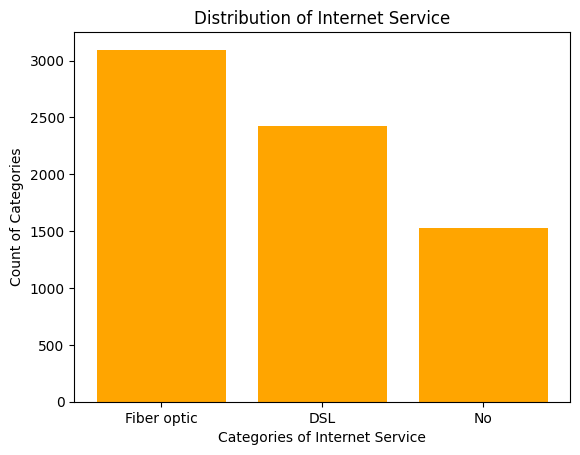

In [23]:
plt.bar(X,Y, color = 'Orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

# 2)

#### a) Build a histogram for the 'tenure' column:
#### b) Set the bins to be 30
#### c) Set the color of the bins to be green
#### d) Title the graph be 'Distribution of Tenure'

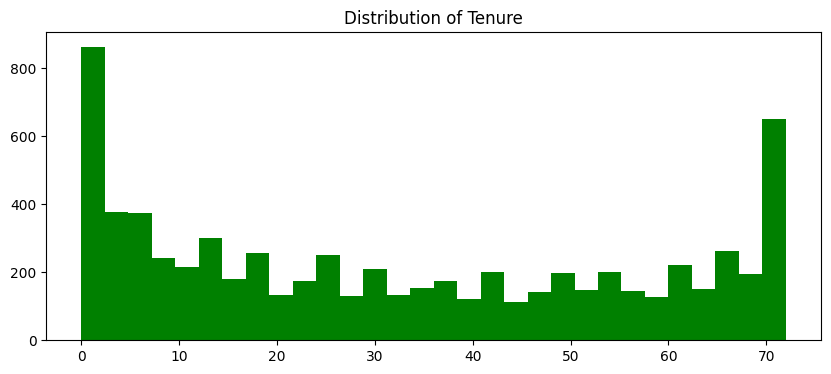

In [24]:
fig = plt.figure(figsize=(10,4))
plt.hist(df['tenure'], bins = 30, color = 'Green')
plt.title('Distribution of Tenure')
plt.show()

# 3)

#### a) Create a scatter plot btw 'Monthly Charges' vs 'tenure'. Assign 'monthly charges' to y-axis and 'tenure' to x-axis
#### b) Setting the title to be 'Tenure vs Monthly Charges'

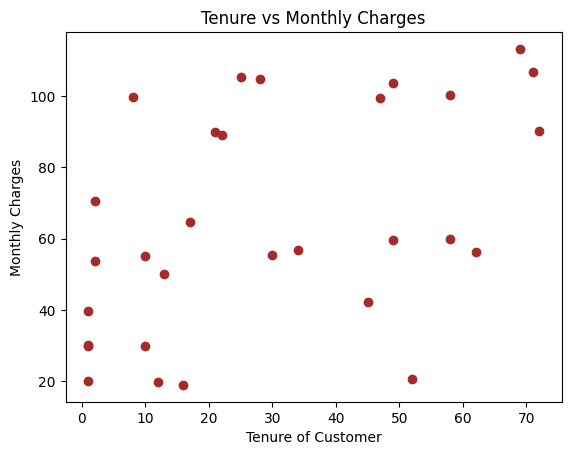

In [25]:
plt.scatter(df['tenure'].head(30), df['MonthlyCharges'].head(30), color = 'Brown')
plt.xlabel('Tenure of Customer')
plt.ylabel('Monthly Charges')
plt.title('Tenure vs Monthly Charges')
plt.show()

# 4)

#### Plot a box plot btw 'tenure' & 'Contract' and assign tenure on y-axis and contract on x-axis 

In [26]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [27]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

<Axes: title={'center': 'tenure'}, xlabel='[Contract]'>

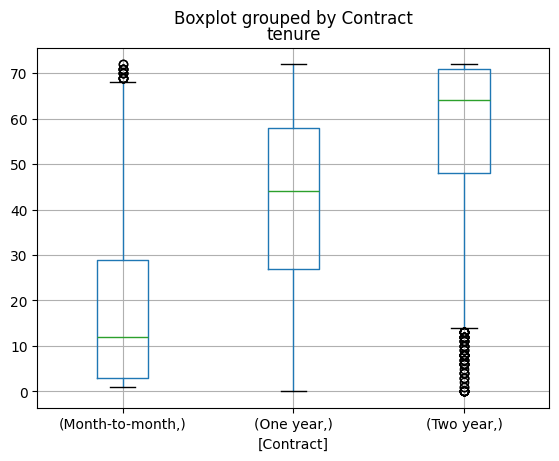

In [29]:
df.boxplot(column = 'tenure', by=['Contract'])

# Linear Regression

#### a) Build a simple linear model where dependant variable is 'MonthlyCharges' and independant variable is 'tenure'
#### b) Dividing the dataset into train and test sets with 70:30 ratio
#### c) Build the model on train set and predict the values on test set
#### d) After predicting the values find the values of root mean square error
#### e) Find out the error in the prediction and store it in the 'error'

In [30]:
X = df.loc[:, ['tenure']] # independant
y = df.loc[:, ['MonthlyCharges']]

In [31]:
X

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [32]:
y

,MonthlyCharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [36]:
lr = LinearRegression()        # Built the model

In [37]:
lr.fit(X_train, y_train)      # training the model

LinearRegression()

In [38]:
y_pred = lr.predict(X_test)    # testing the model predict

In [39]:
mse = mean_squared_error(y_pred, y_test)
mse

864.0415701364655

In [40]:
rmse = np.sqrt(mse)
rmse

29.394584027273893

In [42]:
r2_score(y_test, y_pred) * 100

6.947002812808501

# Logistic Regression

#### a) Creating a single logistic regression model where independant variable is 'Churn' and dependant variable is 'MonthlyCharges'
#### b) Dividing the dataset into 65:35 ratio
#### c) Build the model on train dataset and predict the values on test dataset
#### d) Build the confusion matrix and predict the score

#### e) Building the multiple logistic regression model where dependant variable is 'Churn' and independant variable is 'tenure' and 'MonthlyCharges'
#### f) Divide the dataset into ratio 80:20 ratio
#### g) Build the model on train dataset and predict the values on test dataset
#### h) Build the confusion matrix and predict the score

In [44]:
# Single Logistic Regression model

x = df.loc[:, ['MonthlyCharges']]
y = df.loc[:, ['Churn']]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
Lg = LogisticRegression()

In [49]:
Lg.fit(x_train, y_train)

C:\Users\Shashank\.conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [50]:
y_pred = Lg.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [52]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[1815,  651],
       [   0,    0]], dtype=int64)

In [53]:
acc = accuracy_score(y_pred, y_test)
acc

0.7360097323600974

In [54]:
# Multiple Logistic Regression

x = df.loc[:, ['MonthlyCharges', 'tenure']]
y = df.loc[:, ['Churn']]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [56]:
Mlr = LogisticRegression()

In [57]:
Mlr.fit(x_train, y_train)

C:\Users\Shashank\.conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [59]:
y_pred = Mlr.predict(x_test)

In [60]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[934, 212],
       [107, 156]], dtype=int64)

In [61]:
acc = accuracy_score(y_pred, y_test)
acc

0.7735982966643009

# Decision Tree

#### a) Building a decision tree model where dependant variable is 'Churn' and independant variable is 'tenure'
#### b) Divide the dataset into ratio 80:20 ratio
#### c) Build the model on train dataset and predict the values on test dataset
#### d) Build the confusion matrix and predict the score 

In [62]:
x = df.loc[:, ['tenure']]
y = df.loc[:, ['Churn']]

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt = DecisionTreeClassifier()

In [67]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = dt.predict(x_test)

In [69]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[965, 281],
       [ 76,  87]], dtype=int64)

In [70]:
acc = accuracy_score(y_pred, y_test)
acc

0.7466288147622427

# Random Forest

#### a) Building a Random Forest model where dependant variable is 'Churn' and independant variable are 'tenure' and 'Monthly Charges'
#### b) Divide the dataset into ratio 70:30 ratio
#### c) Build the model on train dataset and predict the values on test dataset
#### d) Build the confusion matrix and calculate the accuracy

In [71]:
x = df.loc[:, ['MonthlyCharges', 'tenure']]
y = df.loc[:, ['Churn']]

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()

In [75]:
rf.fit(x_train, y_train)

C:\Users\Shashank\.conda\envs\myenv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [76]:
y_pred = rf.predict(x_test)

In [77]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[1345,  322],
       [ 215,  231]], dtype=int64)

In [78]:
acc = accuracy_score(y_pred, y_test)
acc

0.7458589682915286